In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from torchsummary import summary

: 

In [ ]:
df=pd.read_csv('Diabetes_5050.csv')

In [ ]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Vemos si hay nulos
null_percentage=df.isnull().mean()*100
null_percentage

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [ ]:
# Veamos los duplicados
duplicados=df.duplicated().sum()
duplicados

np.int64(1635)

In [ ]:
# Eliminamos duplicados y comprobamos
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
# Convertir binarias a enteros (si están en float)
cols = ["Diabetes_binary","HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", 
               "DiffWalk", "Sex","GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income",'BMI']
df[cols] = df[cols].astype(int)

C:\Users\PC\AppData\Local\Temp\ipykernel_16244\449564191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].astype(int)


In [ ]:
df = df.reindex(columns=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income', 'Diabetes_binary'])

# EDA

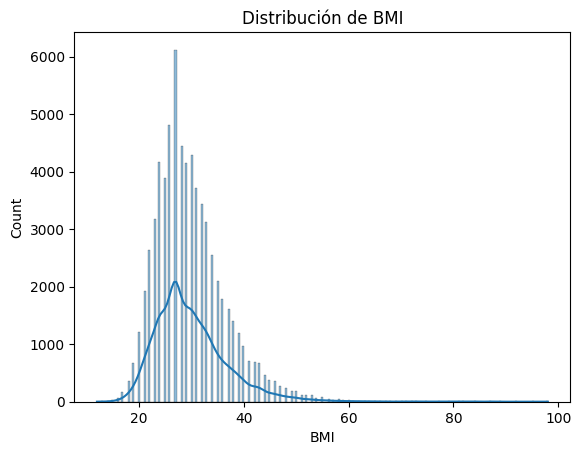

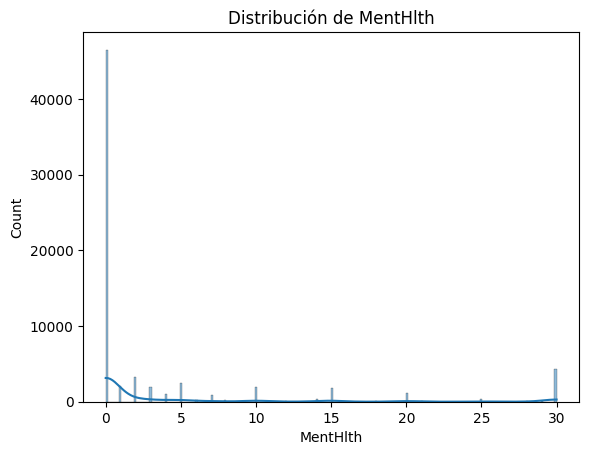

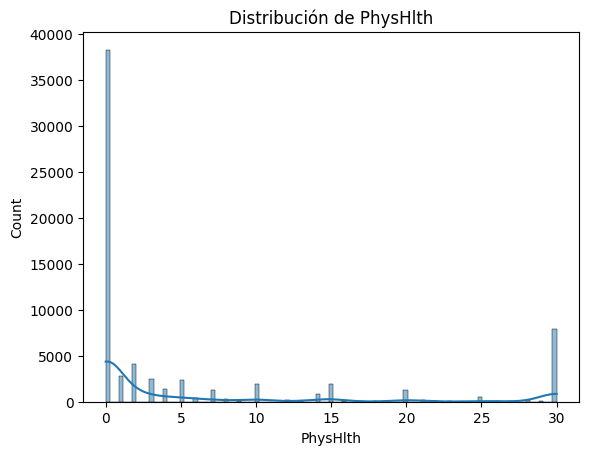

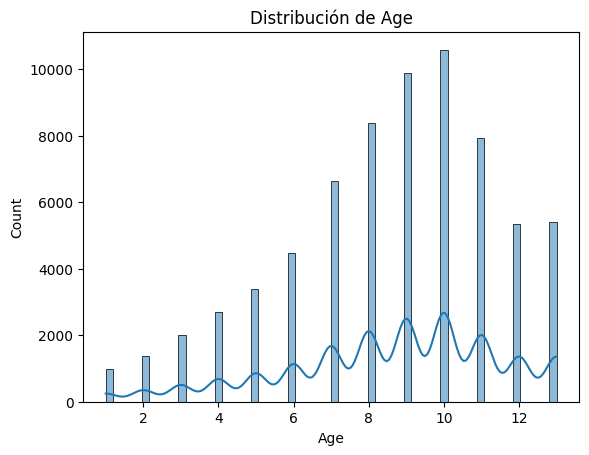

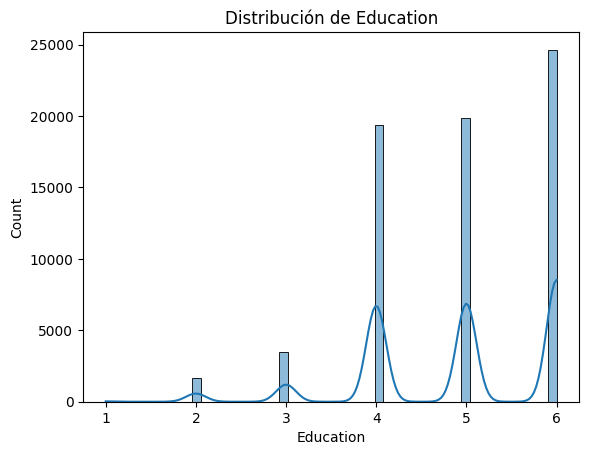

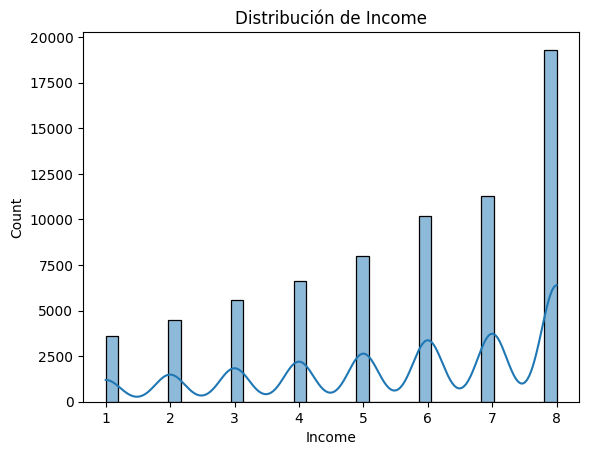

In [ ]:
columns=['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education','Income']
for col in columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

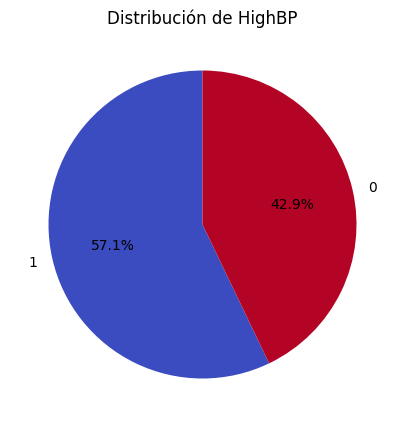

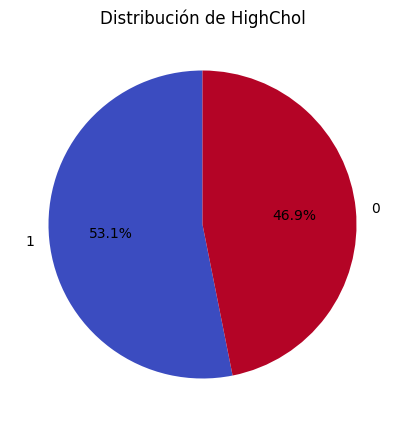

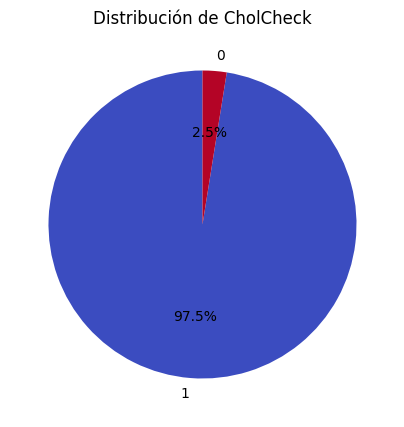

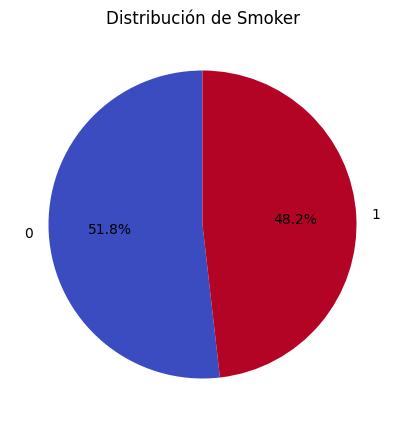

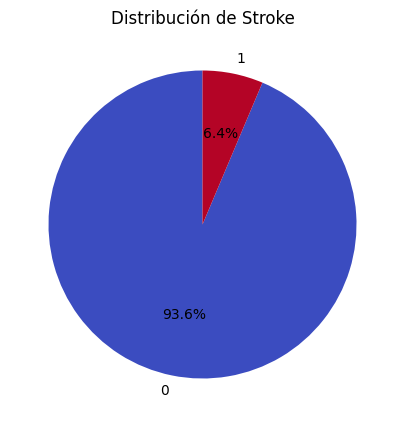

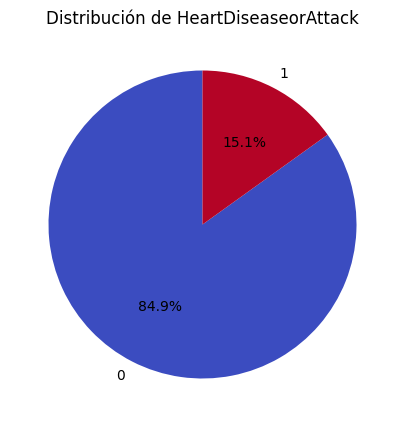

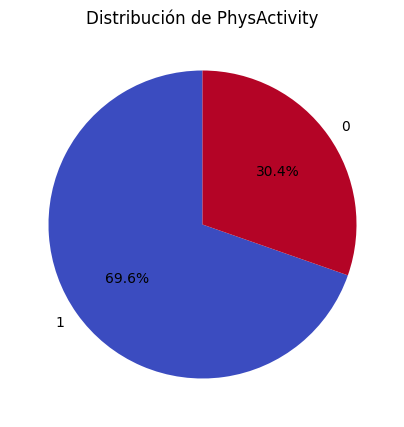

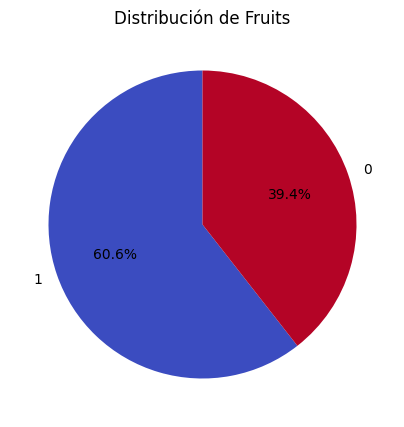

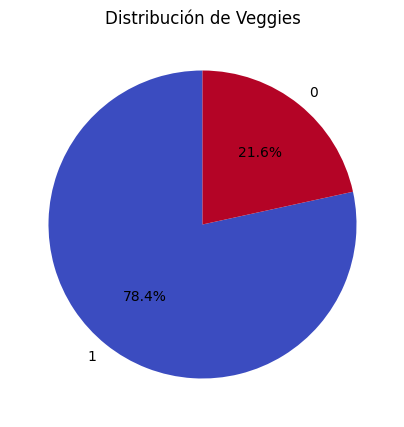

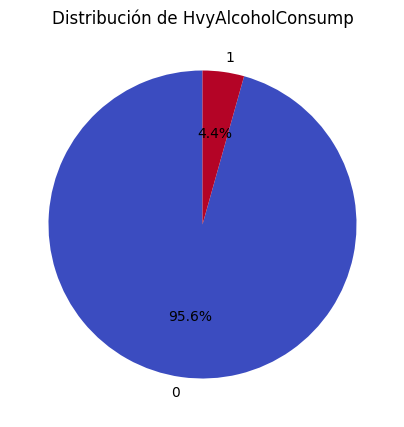

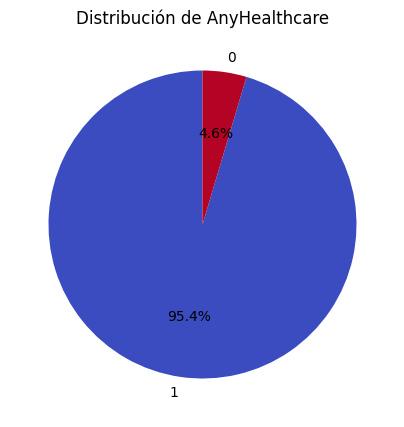

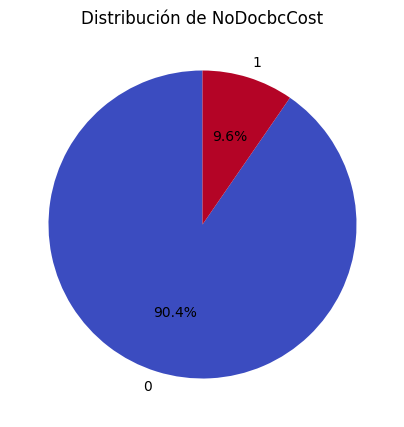

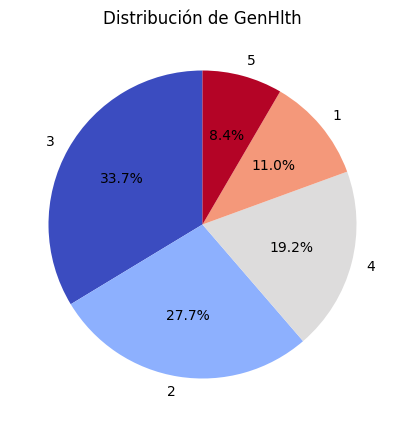

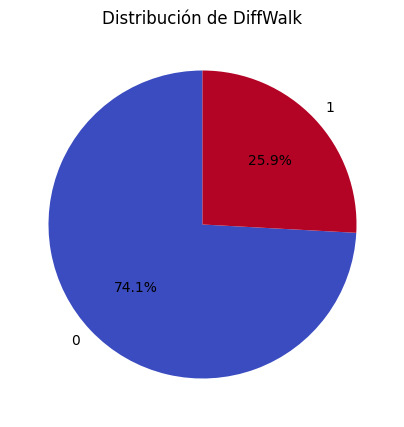

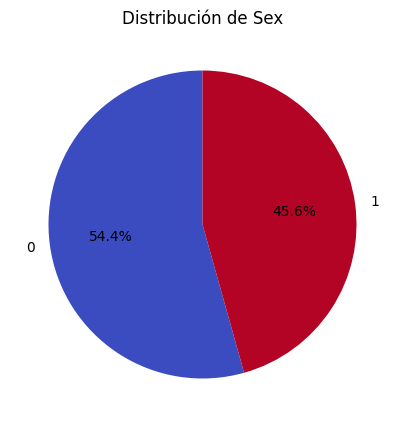

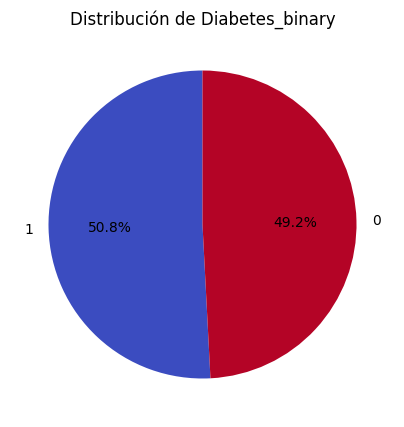

In [ ]:
# Crear gráficos de pastel para cada columna categórica
columns=['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'DiffWalk', 'Sex', 'Diabetes_binary']
for column in columns:
    plt.figure(figsize=(5, 5))  # Tamaño de la figura
    df[column].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="coolwarm")
    plt.title(f"Distribución de {column}")
    plt.ylabel("")  # Quitar la etiqueta del eje Y
    plt.show()


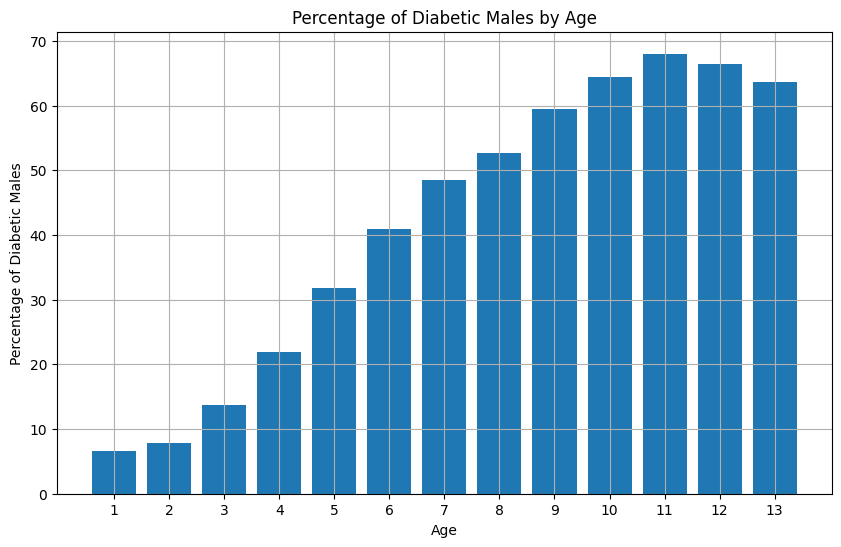

Maximum percentage of diabetic males is 68.04% at age 11.


In [ ]:
data_male = df[df['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes_binary'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes_binary'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes_binary'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age {}.".format(max_percent_age['Diabetes_binary'] * 100, int(max_percent_age['Age'])))

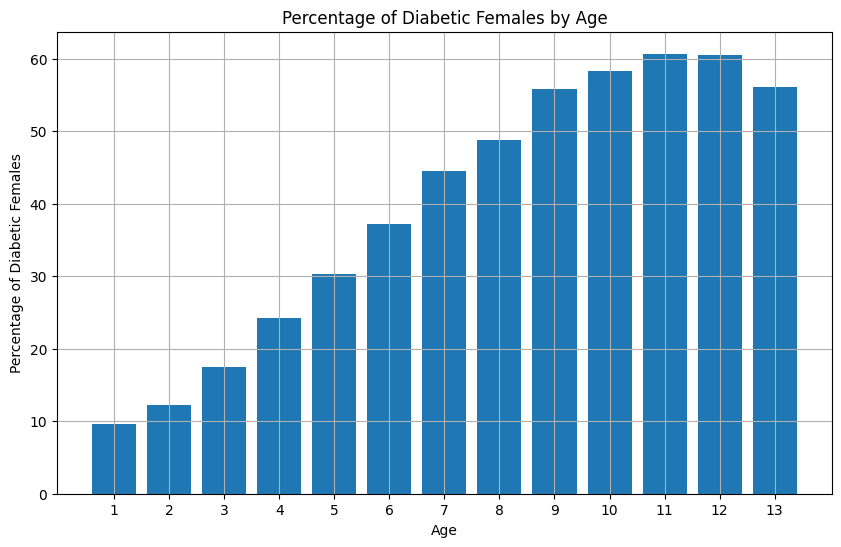

Maximum percentage of diabetic females is 60.71% at age 11.


In [ ]:
# frequency of diabetics of all ages for female

data_female = df[df['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes_binary'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes_binary'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes_binary'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age {}.".format(max_percent_age['Diabetes_binary'] * 100, int(max_percent_age['Age'])))

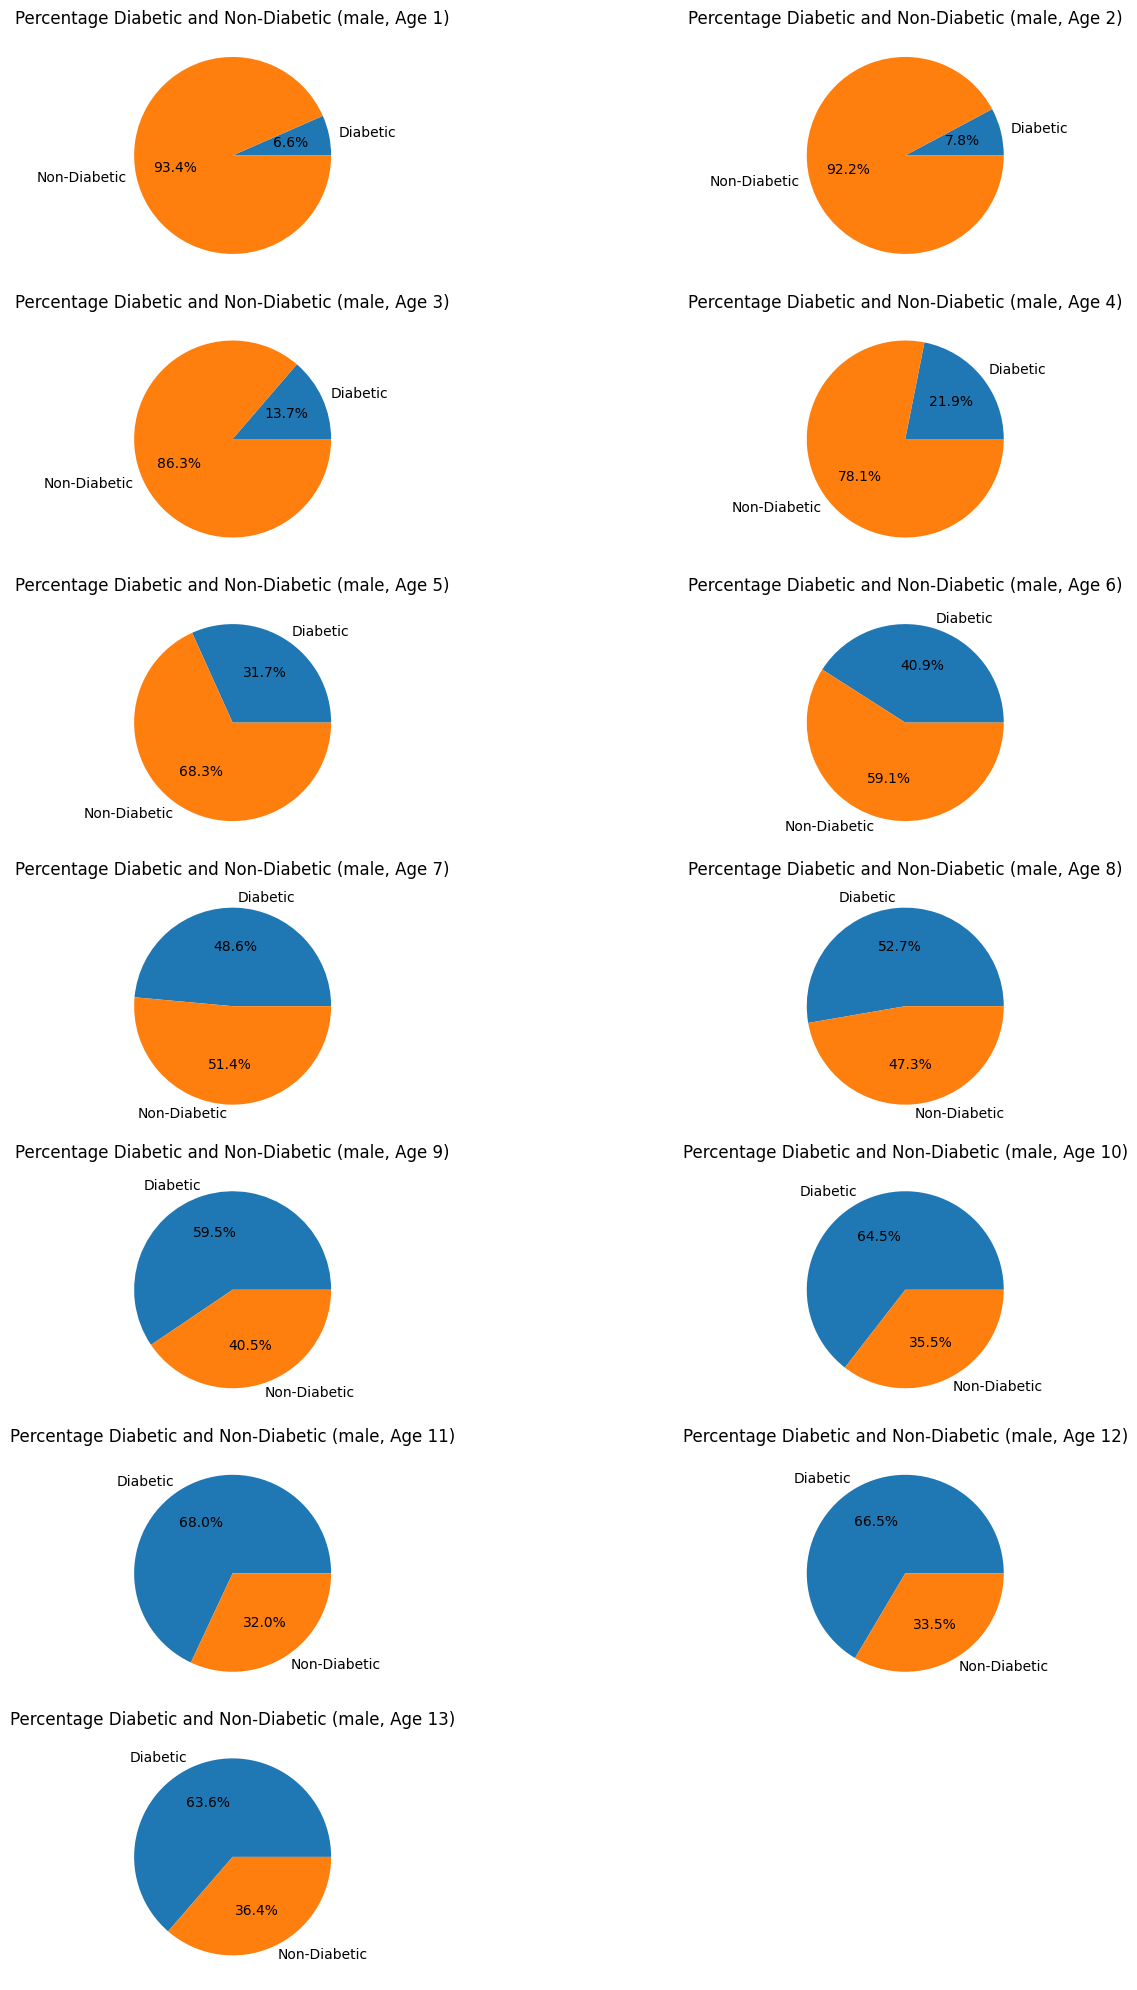

In [ ]:
# percentage of diabetics and nondiabetics for male in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = df[(df['Sex'] == 1) & (df['Age'] == age)]
    total_male = len(df_female)
    diabetic_male = len(df_female[df_female['Diabetes_binary'] == 1])
    non_diabetic_male = len(df_female[df_female['Diabetes_binary'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (male, Age {age})')
plt.tight_layout()
plt.show()

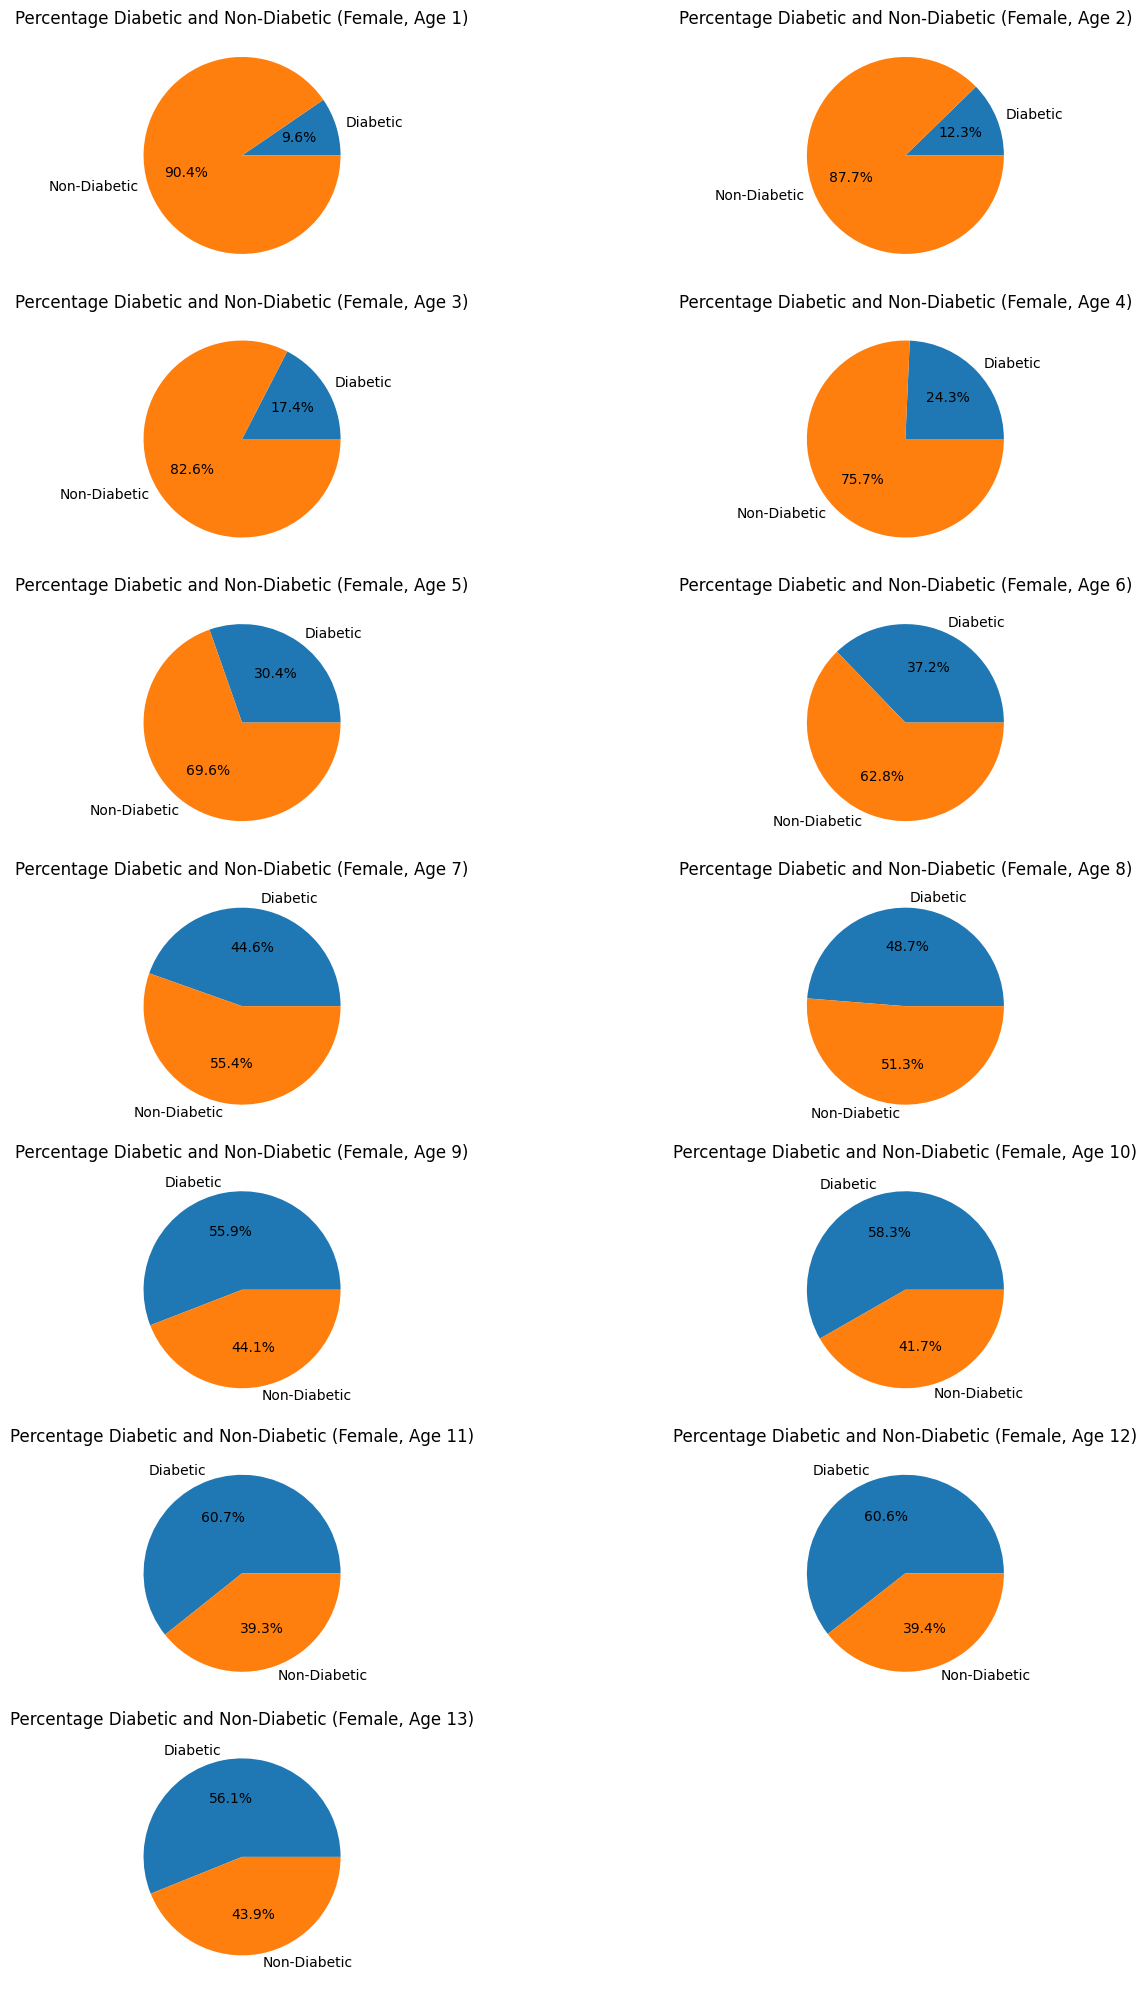

In [ ]:
# percentage of diabetics and nondiabetics for female in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = df[(df['Sex'] == 0) & (df['Age'] == age)]
    total_female = len(df_female)
    diabetic_female = len(df_female[df_female['Diabetes_binary'] == 1])
    non_diabetic_female = len(df_female[df_female['Diabetes_binary'] == 0])
    plt.pie([diabetic_female, non_diabetic_female], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (Female, Age {age})')
plt.tight_layout()
plt.show()

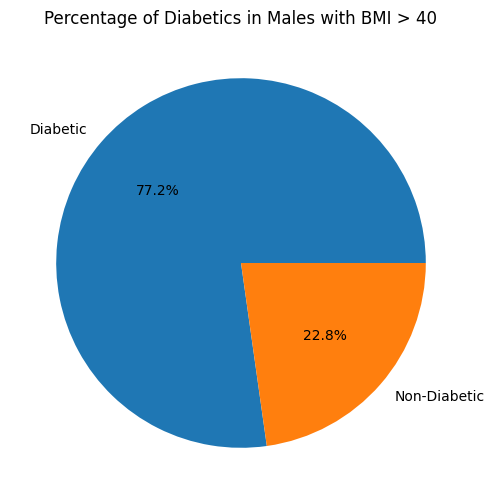

Percentage of diabetics in males with BMI > 40: 77.2%


In [ ]:
# Filter data for males with BMI > 40
male_high_bmi = df[(df['Sex'] == 1) & (df['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes_binary'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with BMI > 40')
plt.show()

print(f"Percentage of diabetics in males with BMI > 40: {percent_diabetic:.1f}%")

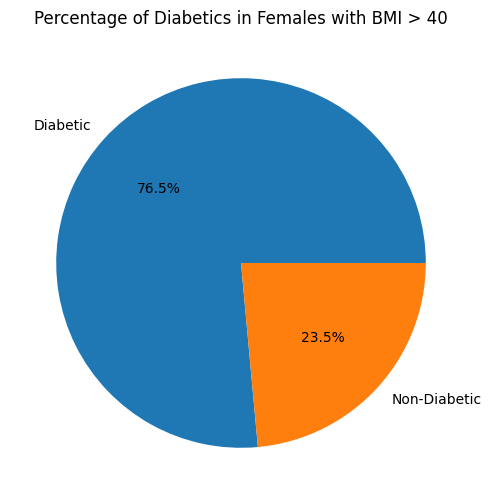

Percentage of diabetics in females with BMI > 40: 76.5%


In [ ]:
# Filter data for females with BMI > 40
female_high_bmi = df[(df['Sex'] == 0) & (df['BMI'] > 40)]

# Calculate percentage of diabetics
total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes_binary'] == 1])
percent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with BMI > 40')
plt.show()

print(f"Percentage of diabetics in females with BMI > 40: {percent_diabetic:.1f}%")

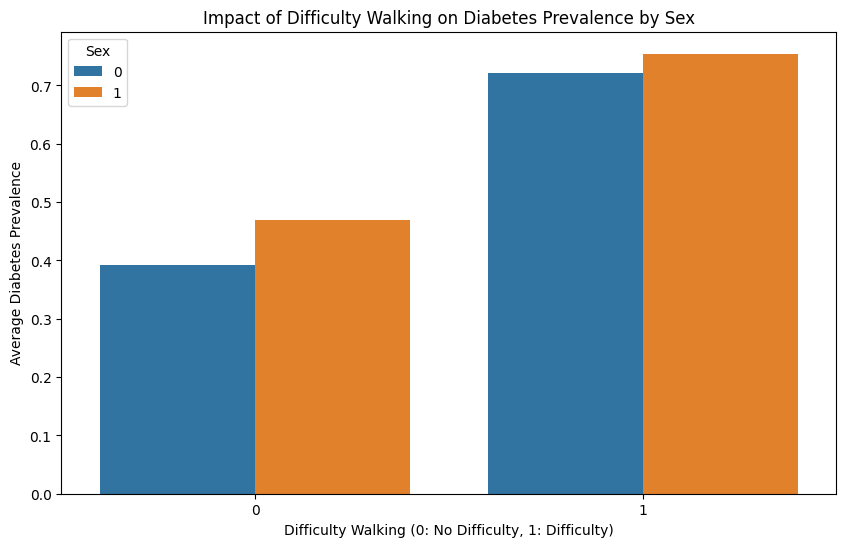

In [ ]:
# Group data by Sex and DiffWalk, calculate mean Diabetes
grouped_data = df.groupby(['Sex', 'DiffWalk'])['Diabetes_binary'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes_binary', hue='Sex', data=grouped_data)
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()

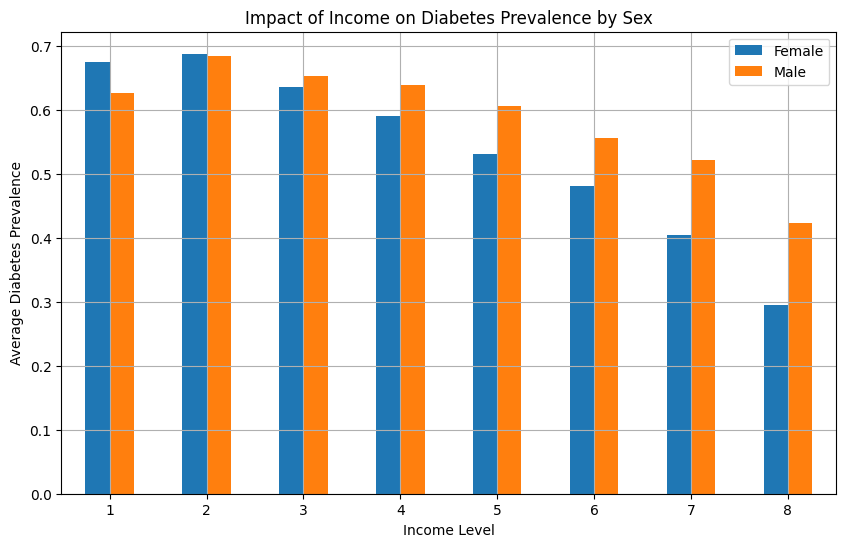

In [ ]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = df.groupby(['Income', 'Sex'])['Diabetes_binary'].mean().unstack()

# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

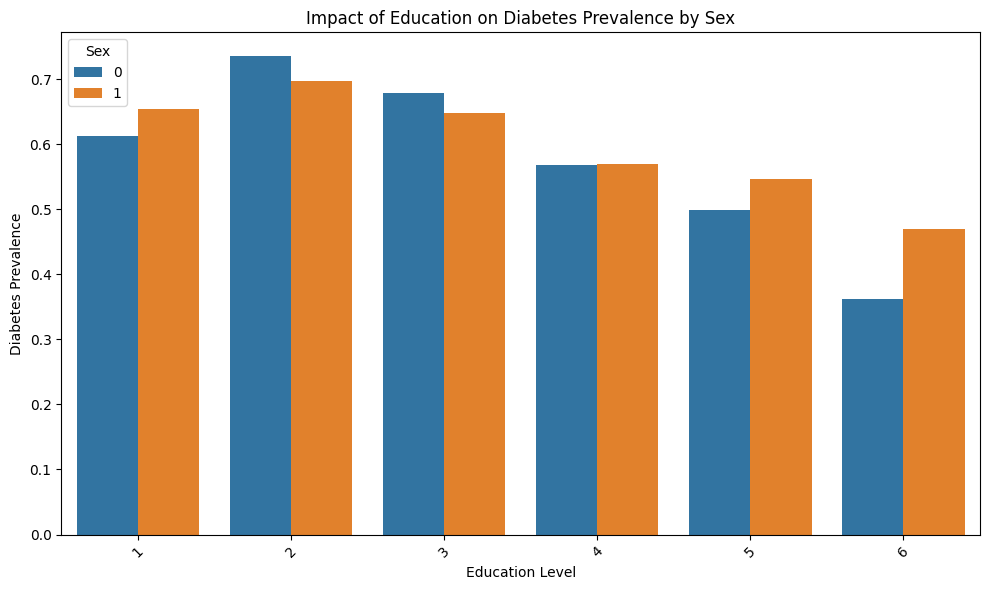

In [ ]:
# the percent impact of education  in  diabetic for male and female
# Group data by education level and sex, and calculate the mean diabetes prevalence
education_diabetes = df.groupby(['Education', 'Sex'])['Diabetes_binary'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes_binary', hue='Sex', data=education_diabetes)
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.title('Impact of Education on Diabetes Prevalence by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper left')
plt.tight_layout()
plt.show()

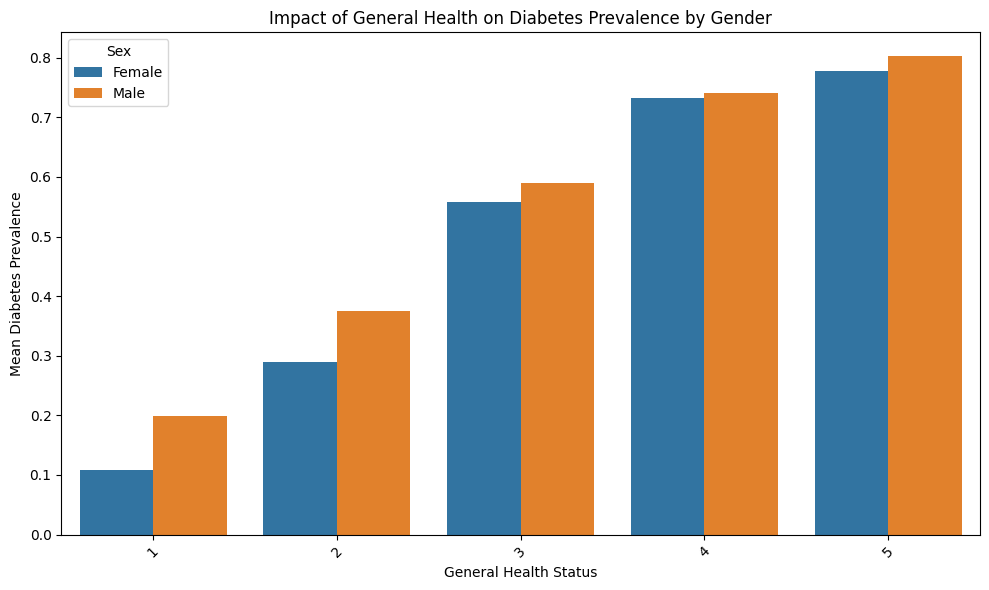

In [ ]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = df.groupby(['Sex', 'GenHlth'])['Diabetes_binary'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth', y='Diabetes_binary', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

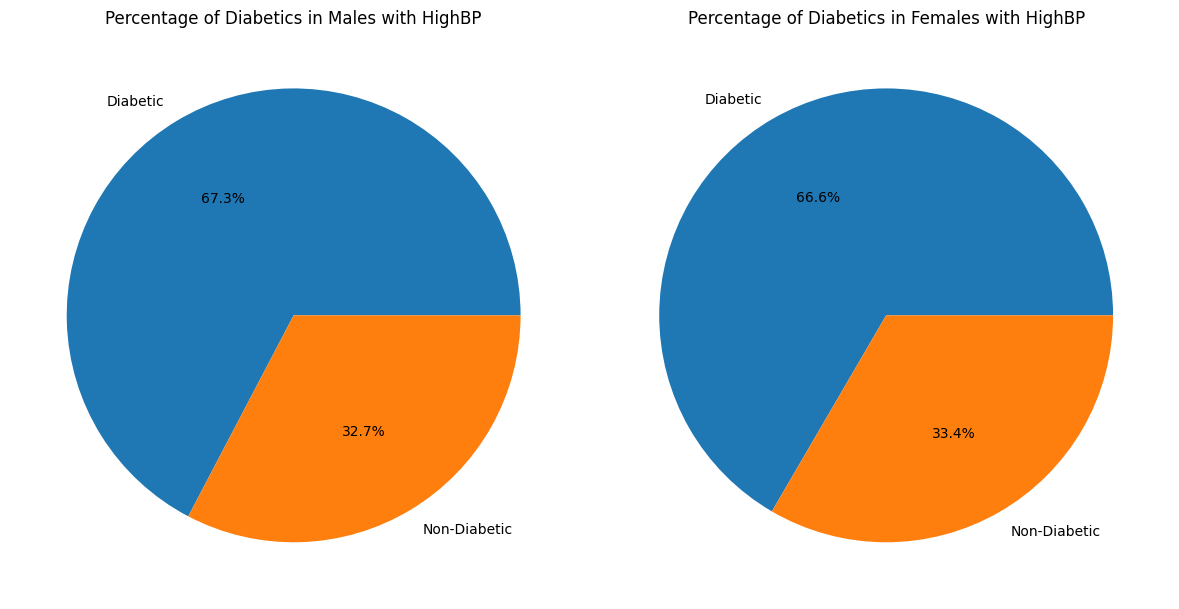

Percentage of diabetics in males with HighBP: 67.3%
Percentage of diabetics in females with HighBP: 66.6%


In [ ]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = df[(df['Sex'] == 1) & (df['HighBP'] == 1)]
female_highbp = df[(df['Sex'] == 0) & (df['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes_binary'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes_binary'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with HighBP: {male_percent_diabetic:.1f}%")
print(f"Percentage of diabetics in females with HighBP: {female_percent_diabetic:.1f}%")

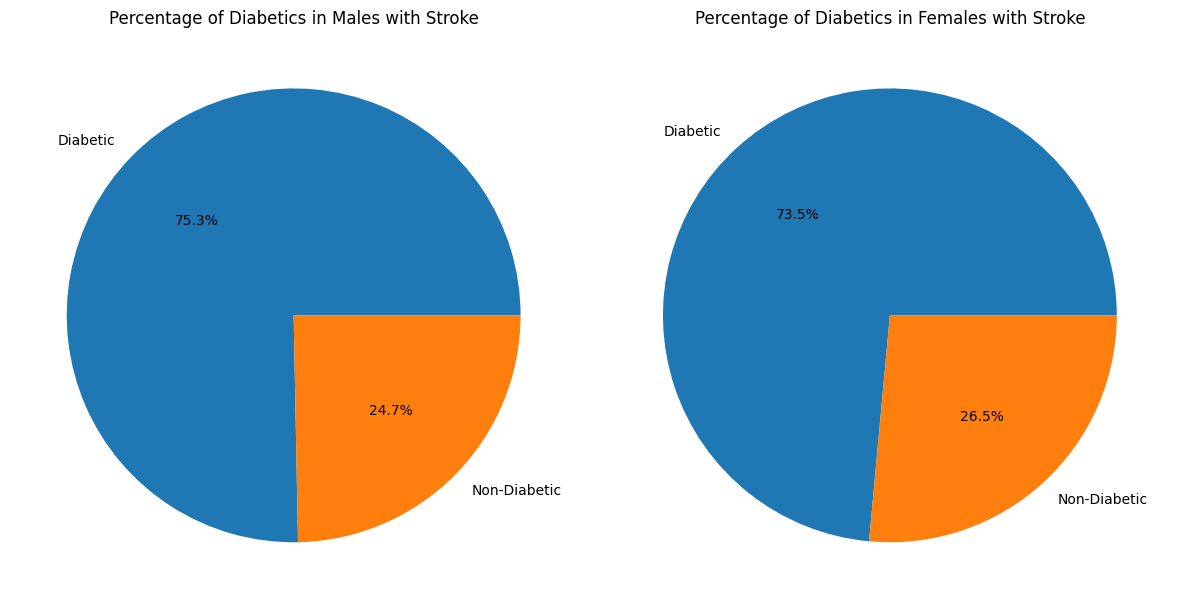

Percentage of diabetics in males with stroke: 75.3%
Percentage of diabetics in females with stroke: 73.5%


In [ ]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = df[(df['Sex'] == 1) & (df['Stroke'] == 1)]
female_stroke = df[(df['Sex'] == 0) & (df['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes_binary'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes_binary'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")

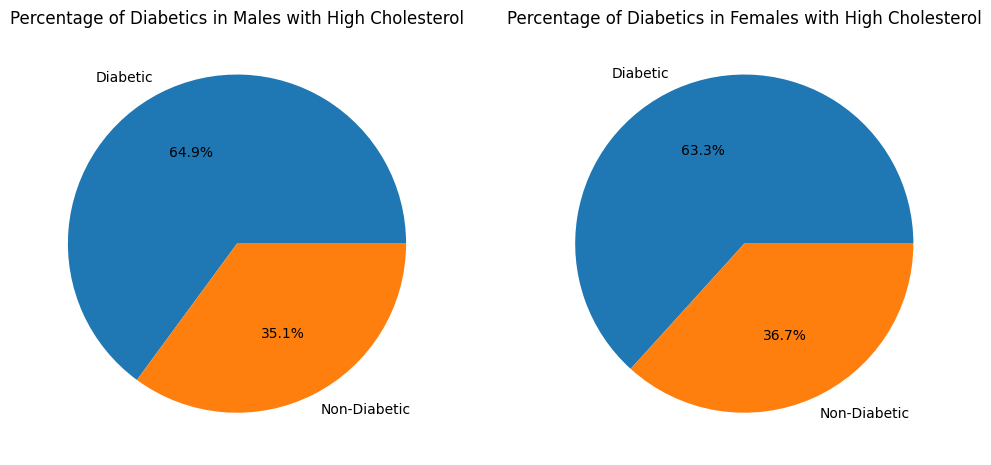

In [ ]:
# Filter data for males and females with and without HighChol
male_highchol = df[(df['Sex'] == 1) & (df['HighChol'] == 1)]
male_no_highchol = df[(df['Sex'] == 1) & (df['HighChol'] == 0)]
female_highchol = df[(df['Sex'] == 0) & (df['HighChol'] == 1)]
female_no_highchol = df[(df['Sex'] == 0) & (df['HighChol'] == 0)]

# Calculate percentages of diabetics
male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes_binary'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes_binary'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes_binary'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes_binary'] == 1]) / len(female_no_highchol)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with High Cholesterol')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with High Cholesterol')

plt.show()

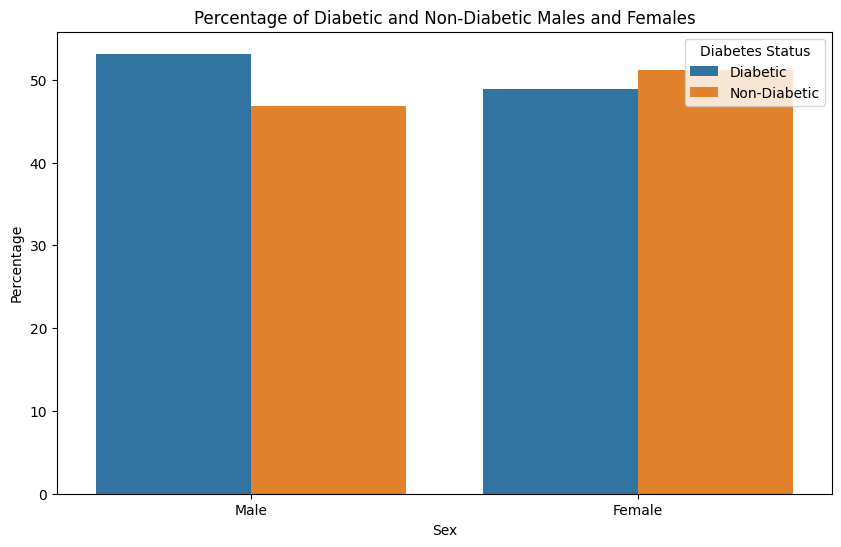

In [ ]:
# Count diabetic and non-diabetic males and females
male_diabetic = df[(df['Sex'] == 1) & (df['Diabetes_binary'] == 1)].shape[0]
male_non_diabetic = df[(df['Sex'] == 1) & (df['Diabetes_binary'] == 0)].shape[0]
female_diabetic = df[(df['Sex'] == 0) & (df['Diabetes_binary'] == 1)].shape[0]
female_non_diabetic = df[(df['Sex'] == 0) & (df['Diabetes_binary'] == 0)].shape[0]

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
data['Percentage'] = data['Count'] / data.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=data)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

In [ ]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

                   HighBP  HighChol       BMI   GenHlth  DiffWalk       Sex  \
HighBP           1.000000  0.308987  0.265017  0.311422  0.229638  0.037824   
HighChol         0.308987  1.000000  0.149103  0.228593  0.157859  0.013250   
BMI              0.265017  0.149103  1.000000  0.270428  0.228031  0.027825   
GenHlth          0.311422  0.228593  0.270428  1.000000  0.463354 -0.016474   
DiffWalk         0.229638  0.157859  0.228031  0.463354  1.000000 -0.082858   
Sex              0.037824  0.013250  0.027825 -0.016474 -0.082858  1.000000   
Age              0.315625  0.211761 -0.048521  0.129545  0.180202 -0.002297   
Diabetes_binary  0.372048  0.281399  0.319481  0.402591  0.267082  0.042538   

                      Age  Diabetes_binary  
HighBP           0.315625         0.372048  
HighChol         0.211761         0.281399  
BMI             -0.048521         0.319481  
GenHlth          0.129545         0.402591  
DiffWalk         0.180202         0.267082  
Sex             -0

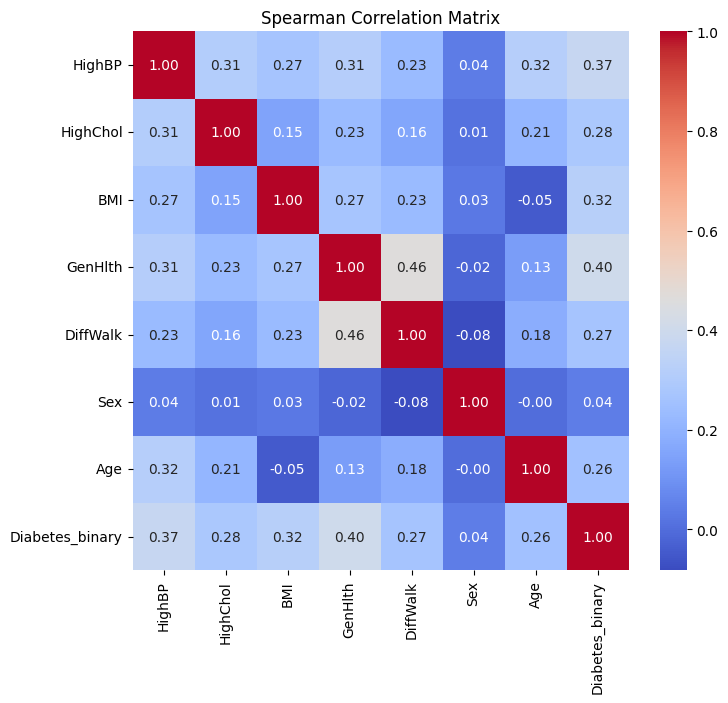

In [ ]:
# Definir las columnas específicas que quieres incluir
columnas = ['HighBP', 'HighChol', 'BMI', 'GenHlth','DiffWalk','Sex','Age','Diabetes_binary']  # Sustituye por las columnas que deseas

# Filtrar el DataFrame para mantener solo las columnas seleccionadas
filtered_df = df[columnas]

# Filtrar solo las columnas numéricas (si hay alguna no numérica en tu selección)
numeric_filtered_df = filtered_df.select_dtypes(include=['number'])

# Calcular la matriz de correlaciones de Spearman
spearman_corr = numeric_filtered_df.corr(method='spearman')

print(spearman_corr)

# Visualizar la matriz de correlaciones
plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

# Procesado de datos

In [ ]:
# Normalizar variables continuas
minmax_cols = ["GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]
standard_cols = ['BMI']
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
df[standard_cols] = standard_scaler.fit_transform(df[standard_cols])
df[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])


# Modelo

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
import numpy as np
X = df.drop(['Diabetes_binary'],axis=1).values
y= df['Diabetes_binary'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify= y_temp)

print("Distribución en Train:\n", np.bincount(y_train) / len(y_train))
print("\nDistribución en Validation:\n", np.bincount(y_val) / len(y_val))
print("\nDistribución en Test:\n", np.bincount(y_test) / len(y_test))

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Distribución en Train:
 [0.49177683 0.50822317]

Distribución en Validation:
 [0.49174631 0.50825369]

Distribución en Test:
 [0.49174631 0.50825369]
Tamaño de X_train: (48339, 21)
Tamaño de X_val: (10359, 21)
Tamaño de X_test: (10359, 21)


In [ ]:
# Convertir datos a tensores asegurando los tamaños correctos
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)  # ← Asegurar que sea de validación

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Verificar tamaños después de la conversión
print(f"Tamaño de X_train_tensor: {X_train_tensor.shape}")
print(f"Tamaño de y_train_tensor: {y_train_tensor.shape}")

print(f"Tamaño de X_val_tensor: {X_val_tensor.shape}")
print(f"Tamaño de y_val_tensor: {y_val_tensor.shape}")  # ← Debe ser (34421,)

print(f"Tamaño de X_test_tensor: {X_test_tensor.shape}")
print(f"Tamaño de y_test_tensor: {y_test_tensor.shape}")

Tamaño de X_train_tensor: torch.Size([48339, 21])
Tamaño de y_train_tensor: torch.Size([48339])
Tamaño de X_val_tensor: torch.Size([10359, 21])
Tamaño de y_val_tensor: torch.Size([10359])
Tamaño de X_test_tensor: torch.Size([10359, 21])
Tamaño de y_test_tensor: torch.Size([10359])


In [ ]:
# Definir la Red Neuronal
class DiabetesNN(nn.Module):
    def __init__(self, input_size):
        super(DiabetesNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.5)  # Probabilidad de desactivación de 50%

    def forward(self, x):
        x = self.relu(self.fc1(x))             # Capa 1 + ReLU
        x = self.dropout(x)                    # Dropout después de la primera capa
        x = self.relu(self.fc2(x))             # Capa 2 + ReLU
        x = self.dropout(x)                    # Dropout después de la segunda capa
        x = self.relu(self.fc3(x))             # Capa 3 + ReLU
        x = self.fc4(x)                        # Capa de salida (sin activación ReLU ya que usamos Sigmoid más tarde)
        x = self.sigmoid(x)                    # Aplicar Sigmoid para obtener probabilidad
        return x

In [ ]:
import torch

print("CUDA disponible:", torch.cuda.is_available())  # Debe imprimir True
print("Número de GPUs:", torch.cuda.device_count())  # Debe ser mayor que 0
print("Nombre de la GPU:", torch.cuda.get_device_name(0))  # Debe mostrar el nombre de tu GPU
print("Dispositivo actual:", torch.cuda.current_device())  # Debe ser 0 si hay GPU

CUDA disponible: True
Número de GPUs: 1
Nombre de la GPU: NVIDIA GeForce RTX 4060 Laptop GPU
Dispositivo actual: 0


In [ ]:
# Verificar si hay GPU disponible y mover el modelo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Crear el modelo y moverlo a la GPU si está disponible
input_size = X_train.shape[1]  # Número de características
model = DiabetesNN(input_size).to(device)

# Mostrar el sumario del modelo
summary(model, (input_size,))  # Mostrar la estructura del modelo

Usando dispositivo: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           1,408
              ReLU-2                   [-1, 64]               0
           Dropout-3                   [-1, 64]               0
            Linear-4                   [-1, 32]           2,080
              ReLU-5                   [-1, 32]               0
           Dropout-6                   [-1, 32]               0
            Linear-7                   [-1, 16]             528
              ReLU-8                   [-1, 16]               0
            Linear-9                    [-1, 1]              17
          Sigmoid-10                    [-1, 1]               0
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (

In [ ]:
X_train_tensor = X_train_tensor.to(device)
X_val_tensor = X_val_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)

y_train_tensor = y_train_tensor.to(device)
y_val_tensor = y_val_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [ ]:
# Definir función de pérdida y optimizador

# Usar la ponderación en la función de pérdida
criterion = nn.BCELoss()  # Binary Cross Entropy 
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listas para almacenar las pérdidas
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Entrenamiento del modelo
epochs = 1000
for epoch in range(epochs):
    # Forward pass para el conjunto de entrenamiento
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Guardar la pérdida de entrenamiento
    train_losses.append(loss.item())

    # Calcular precisión en entrenamiento
    train_preds = (outputs >= 0.3).int()
    train_acc = (train_preds == y_train_tensor).float().mean().item()
    train_accuracies.append(train_acc)

    # Evaluación en validación
    model.eval()  
    with torch.no_grad():
        val_outputs = model(X_val_tensor).squeeze()
        val_loss = criterion(val_outputs, y_val_tensor.float())

        # Guardar la pérdida de validación
        val_losses.append(val_loss.item())

        # Calcular precisión en validación
        val_preds = (val_outputs >= 0.3).int()
        val_acc = (val_preds == y_val_tensor).float().mean().item()
        val_accuracies.append(val_acc)
    
    # Imprimir métricas cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}/{epochs}] - "
              f"Train Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.4f}")

Época [10/1000] - Train Loss: 0.6872, Train Acc: 0.5082 - Val Loss: 0.6859, Val Acc: 0.5083
Época [20/1000] - Train Loss: 0.6675, Train Acc: 0.5082 - Val Loss: 0.6655, Val Acc: 0.5083
Época [30/1000] - Train Loss: 0.6368, Train Acc: 0.5082 - Val Loss: 0.6349, Val Acc: 0.5083
Época [40/1000] - Train Loss: 0.6074, Train Acc: 0.5082 - Val Loss: 0.6075, Val Acc: 0.5083
Época [50/1000] - Train Loss: 0.5891, Train Acc: 0.5082 - Val Loss: 0.5906, Val Acc: 0.5083
Época [60/1000] - Train Loss: 0.5732, Train Acc: 0.5082 - Val Loss: 0.5745, Val Acc: 0.5083
Época [70/1000] - Train Loss: 0.5550, Train Acc: 0.5659 - Val Loss: 0.5561, Val Acc: 0.6024
Época [80/1000] - Train Loss: 0.5373, Train Acc: 0.6975 - Val Loss: 0.5387, Val Acc: 0.6972
Época [90/1000] - Train Loss: 0.5254, Train Acc: 0.7102 - Val Loss: 0.5278, Val Acc: 0.7073
Época [100/1000] - Train Loss: 0.5193, Train Acc: 0.7134 - Val Loss: 0.5220, Val Acc: 0.7099
Época [110/1000] - Train Loss: 0.5159, Train Acc: 0.7171 - Val Loss: 0.5189, Va

In [ ]:
# Evaluación del modelo en el conjunto de validación
with torch.no_grad():
    val_outputs = model(X_val_tensor).view(-1)  # Ajustar la forma
    print(f"Tamaño de val_outputs: {val_outputs.shape}, Tamaño de y_val_tensor: {y_val_tensor.shape}")

    val_outputs = (val_outputs >= 0.5).int()  # Convertir probabilidades a clases (0 o 1)

# Calcular métricas en el conjunto de validación
val_accuracy = accuracy_score(y_val_tensor.cpu(), val_outputs.cpu())  # Mover a CPU antes de usar sklearn
print(f"\nAccuracy en Validation: {val_accuracy:.4f}")
print("\n", classification_report(y_val_tensor.cpu(), val_outputs.cpu()))  # Mover a CPU

Tamaño de val_outputs: torch.Size([10359]), Tamaño de y_val_tensor: torch.Size([10359])

Accuracy en Validation: 0.7439

               precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      5094
         1.0       0.73      0.79      0.76      5265

    accuracy                           0.74     10359
   macro avg       0.75      0.74      0.74     10359
weighted avg       0.75      0.74      0.74     10359



C:\Users\PC\AppData\Local\Temp\ipykernel_16244\2816379043.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=perm_importance_df, palette="viridis")


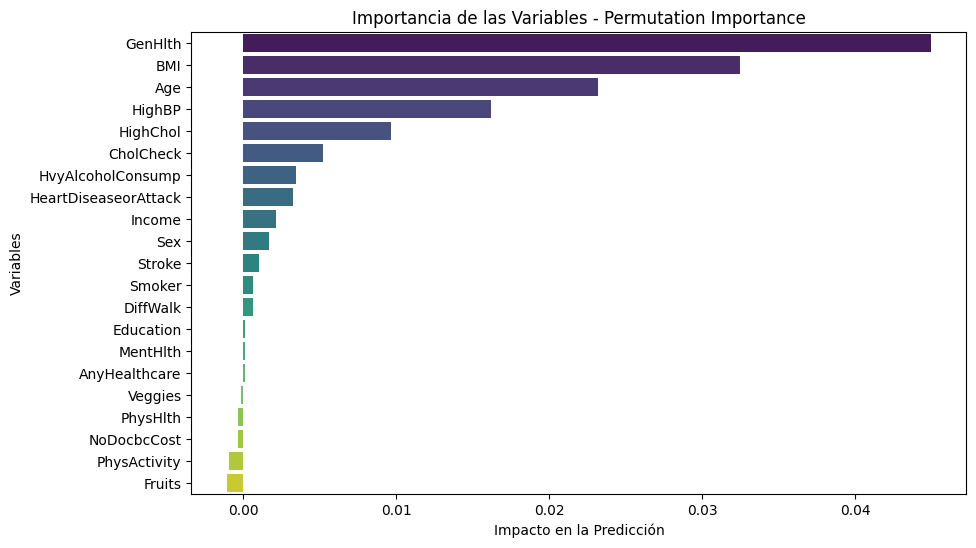

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Crear un wrapper para que la red sea compatible con Scikit-Learn
class TorchModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model.eval()  # Poner en modo evaluación

    def fit(self, X, y):
        """Método requerido por Scikit-Learn, pero no se usa."""
        pass

    def predict(self, X):
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = self.model(X_tensor).squeeze().cpu().numpy()
            return (outputs >= 0.5).astype(int)  # Convertir a 0 o 1
    
    def predict_proba(self, X):
        """Devuelve las probabilidades de las clases"""
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = self.model(X_tensor).squeeze().cpu().numpy()
            return np.vstack([1 - outputs, outputs]).T  # Formato (N, 2)

# Crear el modelo compatible con Scikit-Learn
wrapped_model = TorchModelWrapper(model)

# Convertir X_val e y_val a NumPy
X_val_np = X_val.cpu().numpy() if isinstance(X_val, torch.Tensor) else np.array(X_val)
y_val_np = y_val.cpu().numpy() if isinstance(y_val, torch.Tensor) else np.array(y_val)

# Calcular Permutation Importance
result = permutation_importance(wrapped_model, X_val_np, y_val_np, n_repeats=10, random_state=42, scoring="accuracy")

# Asegurar que los nombres de las variables sean los correctos
feature_names = list(df.columns[:-1])  # Suponiendo que la última columna es la variable objetivo

# Crear DataFrame con los resultados de Permutation Importance
perm_importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by="Importancia", ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Variable", data=perm_importance_df, palette="viridis")
plt.title("Importancia de las Variables - Permutation Importance")
plt.xlabel("Impacto en la Predicción")
plt.ylabel("Variables")
plt.show()




In [ ]:
# Evaluación final del modelo en el conjunto de test
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_outputs = (test_outputs >= 0.5).int()  # Convertir probabilidades a clases (0 o 1)

# Calcular métricas en el conjunto de test
test_accuracy = accuracy_score(y_test_tensor.cpu(), test_outputs.cpu())  # Mover a CPU antes de usar sklearn
print(f"\nAccuracy en Test: {test_accuracy:.4f}")
print("\n", classification_report(y_test_tensor.cpu(), test_outputs.cpu()))  # Mover a CPU


Accuracy en Test: 0.7531

               precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      5094
         1.0       0.73      0.82      0.77      5265

    accuracy                           0.75     10359
   macro avg       0.76      0.75      0.75     10359
weighted avg       0.76      0.75      0.75     10359



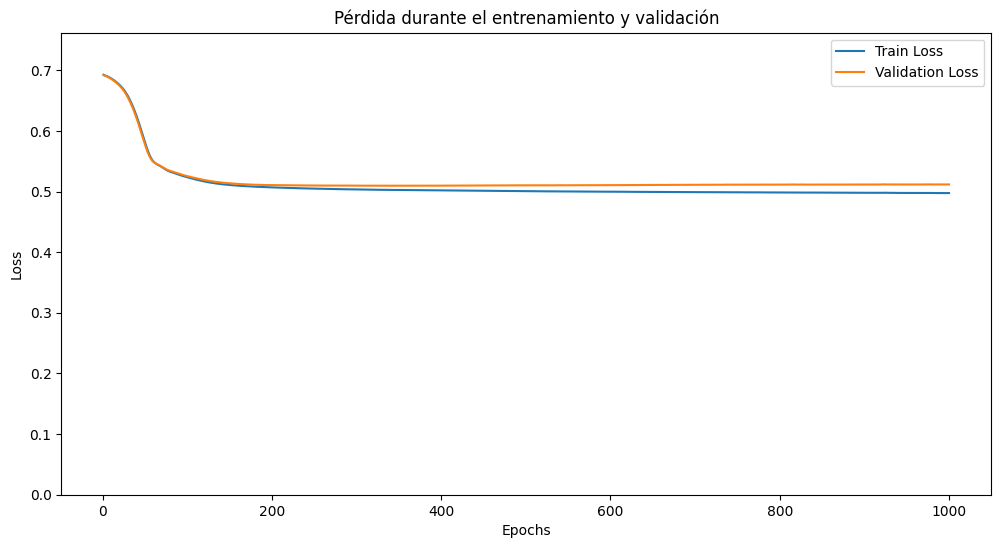

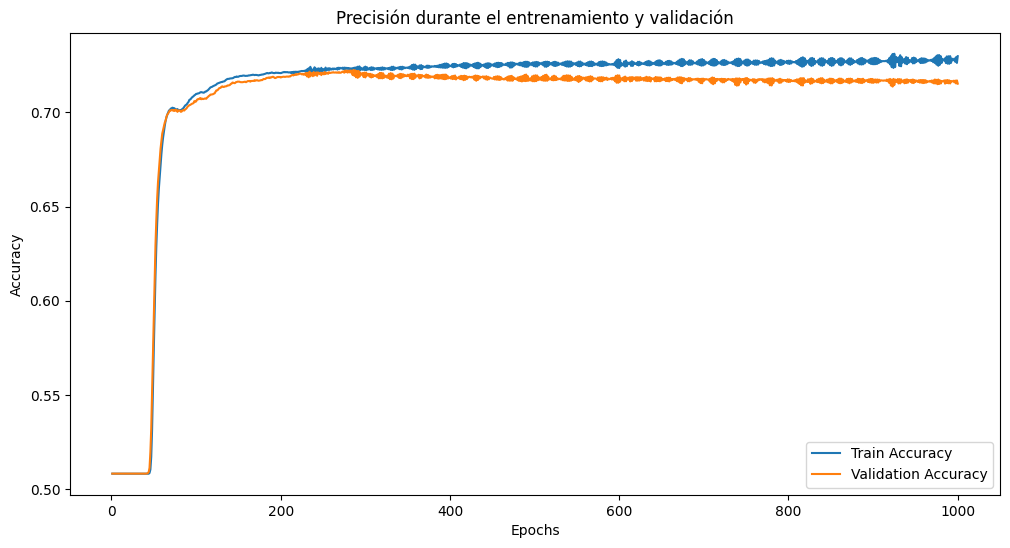

In [ ]:
# Gráfica de la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Pérdida durante el entrenamiento y validación')
plt.ylim(0, max(max(train_losses), max(val_losses)) * 1.1)
plt.legend()
plt.show()

# Gráfica de la precisión de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Precisión durante el entrenamiento y validación')

plt.legend()
plt.show()

In [ ]:
model.save('rnn_model.h5')

NameError: name 'model' is not defined